In [2]:
import pandas as pd

## melting

In [3]:
df = pd.read_csv("~/Documents/2scripts/ScientificPython/1_Basics/Lecture3_DataWrangling/data/pew-raw.csv")

In [4]:
df.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


In [6]:
# from wide format to long format

formatted_df = pd.melt(
    frame = df,
    id_vars = "religion")

formatted_df.head(30)

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


In [7]:
formatted_df = formatted_df.rename(columns = {'variable':'income',
                                              'value':'freq'})
formatted_df.head(10)

,religion,income,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


In [8]:
formatted_df = formatted_df.sort_values(by="religion")
formatted_df.head(20)

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


## plotting

In [9]:
# let's plot something...
import seaborn as sns

[Text(0, 0, 'Agnostic'),
 Text(0, 0, 'Atheist'),
 Text(0, 0, 'Buddhist'),
 Text(0, 0, 'Catholic'),
 Text(0, 0, 'Dont know/refused'),
 Text(0, 0, 'Evangelical Prot '),
 Text(0, 0, 'Hindu '),
 Text(0, 0, 'Historically Black Prot '),
 Text(0, 0, 'Jehovahs Witness '),
 Text(0, 0, 'Jewish ')]

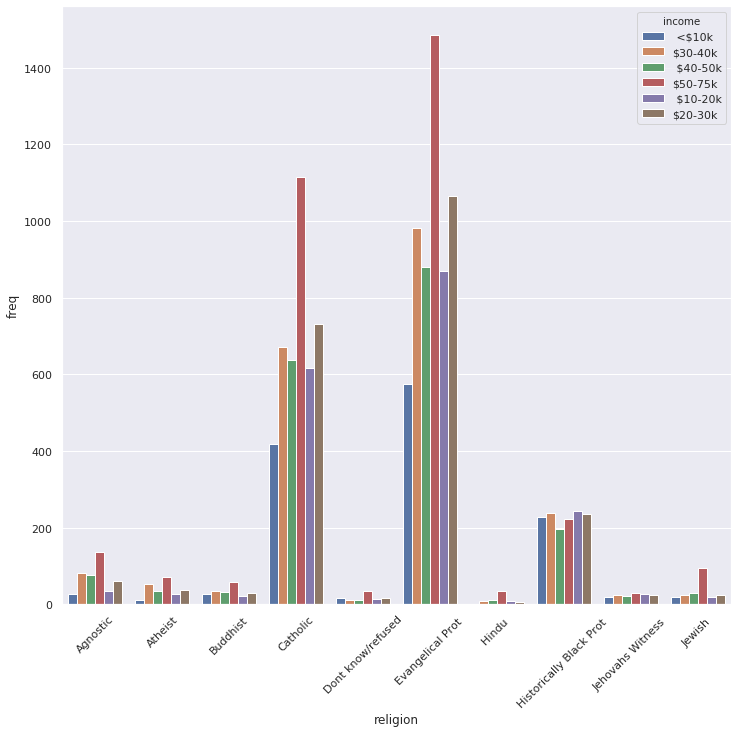

In [11]:
# ...on a big canvas...
sns.set(rc={'figure.figsize':(12,11)})

g = sns.barplot(x="religion",
                y="freq", 
                hue="income", 
                data = formatted_df)

# with readable x labels
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

## melting, merging, NA dropping and many more

In [12]:
df = pd.read_csv("~/Documents/2scripts/ScientificPython/1_Basics/Lecture3_DataWrangling/data/tb-raw.csv")
df

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


In [13]:
df = pd.melt(df, 
             id_vars=["country","year"], 
             var_name="sex_and_age",
             value_name="cases")

In [14]:
df.head()

,country,year,sex_and_age,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [16]:
# print(type(df["sex_and_age"]))
print(type(df["sex_and_age"].str))

<class 'pandas.core.strings.StringMethods'>


In [17]:
tmp_df = df["sex_and_age"].str.extract("(m|f)(\d{0,2})(\d{2})")

tmp_df.head(60)
tmp_df.tail(60)

,0,1,2
30,m,35,44
31,m,35,44
32,m,35,44
33,m,35,44
34,m,35,44
35,m,35,44
36,m,35,44
37,m,35,44
38,m,35,44
39,m,35,44


In [19]:
# Name columns
tmp_df.columns = ["sex", 
                  "age_lower", 
                  "age_upper"]

In [20]:
# Create `age`column based on `age_lower` and `age_upper`
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

tmp_df.tail(40)

,sex,age_lower,age_upper,age
50,m,55,64,55-64
51,m,55,64,55-64
52,m,55,64,55-64
53,m,55,64,55-64
54,m,55,64,55-64
55,m,55,64,55-64
56,m,55,64,55-64
57,m,55,64,55-64
58,m,55,64,55-64
59,m,55,64,55-64


In [ ]:
df

In [21]:
# Merge 
df = pd.concat([df, tmp_df], axis=1)

In [22]:
df

,country,year,sex_and_age,cases,sex,age_lower,age_upper,age
0,AD,2000,m014,0.0,m,0,14,0-14
1,AE,2000,m014,2.0,m,0,14,0-14
2,AF,2000,m014,52.0,m,0,14,0-14
3,AG,2000,m014,0.0,m,0,14,0-14
4,AL,2000,m014,2.0,m,0,14,0-14
...,...,...,...,...,...,...,...,...
85,AM,2000,f014,1.0,f,0,14,0-14
86,AN,2000,f014,0.0,f,0,14,0-14
87,AO,2000,f014,247.0,f,0,14,0-14
88,AR,2000,f014,121.0,f,0,14,0-14


In [23]:
df = df.dropna()

In [24]:
df.tail(40)

,country,year,sex_and_age,cases,sex,age_lower,age_upper,age
36,AN,2000,m3544,2.0,m,35,44,35-44
37,AO,2000,m3544,912.0,m,35,44,35-44
38,AR,2000,m3544,402.0,m,35,44,35-44
40,AD,2000,m4554,0.0,m,45,54,45-54
41,AE,2000,m4554,5.0,m,45,54,45-54
42,AF,2000,m4554,129.0,m,45,54,45-54
43,AG,2000,m4554,0.0,m,45,54,45-54
44,AL,2000,m4554,24.0,m,45,54,45-54
45,AM,2000,m4554,63.0,m,45,54,45-54
46,AN,2000,m4554,0.0,m,45,54,45-54


In [25]:
df = df.drop(["sex_and_age", "age_lower", "age_upper"], axis = 1)

In [26]:
df.tail(40)

,country,year,cases,sex,age
36,AN,2000,2.0,m,35-44
37,AO,2000,912.0,m,35-44
38,AR,2000,402.0,m,35-44
40,AD,2000,0.0,m,45-54
41,AE,2000,5.0,m,45-54
42,AF,2000,129.0,m,45-54
43,AG,2000,0.0,m,45-54
44,AL,2000,24.0,m,45-54
45,AM,2000,63.0,m,45-54
46,AN,2000,0.0,m,45-54


In [27]:
df.sort_values(by = "country")

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
60,AD,2000,0.0,m,-65
50,AD,2000,0.0,m,55-64
30,AD,2000,0.0,m,35-44
20,AD,2000,1.0,m,25-34
...,...,...,...,...,...
18,AR,2000,278.0,m,15-24
8,AR,2000,97.0,m,0-14
88,AR,2000,121.0,f,0-14
49,AS,2000,1.0,m,45-54
